In [1]:
from hydra import compose, initialize
import omegaconf

import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
from model.dntm.DynamicNeuralTuringMachine import build_dntm

In [3]:
initialize(config_path='../conf/slurm', job_name='visualize_addresses')
cfg = compose(config_name='train_smnist')

In [4]:
cfg.run.device = 'cpu'
cfg.run.project_path = '/media/shift97/MyPassport/Flavio/repos/seq-mnist'

In [5]:
print(omegaconf.OmegaConf.to_yaml(cfg))

run:
  device: cpu
  loglevel: INFO
  project_path: /media/shift97/MyPassport/Flavio/repos/seq-mnist
  codename: default_slurm
  seed: 2147483647
  wandb_mode: online
model:
  name: dntm
  n_locations: 1000
  content_size: 8
  address_size: 8
  controller_input_size: 1
  controller_output_size: 10
  controller_hidden_state_size: 100
  ckpt: null
data:
  num_train: 60000
  num_test: 10000
  permute: false
train:
  lr: 0.001
  batch_size: 64
  epochs: 200
  patience: 10
  perc_valid: 0.1
  max_grad_norm: 0.1
  optimizer: adam



In [6]:
dntm = build_dntm(cfg, torch.device(cfg.run.device))

In [7]:
trained_addresses = dntm.memory.memory_addresses.detach().numpy()

In [8]:
cos_sim_addresses = cosine_similarity(trained_addresses, trained_addresses)

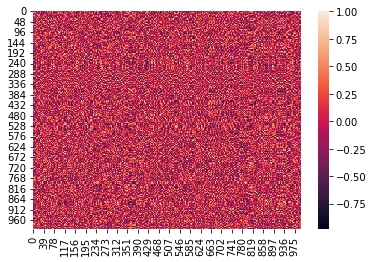

In [9]:
_ = sns.heatmap(cos_sim_addresses)

/media/shift97/MyPassport/Flavio/repos/seq-mnist/.env/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


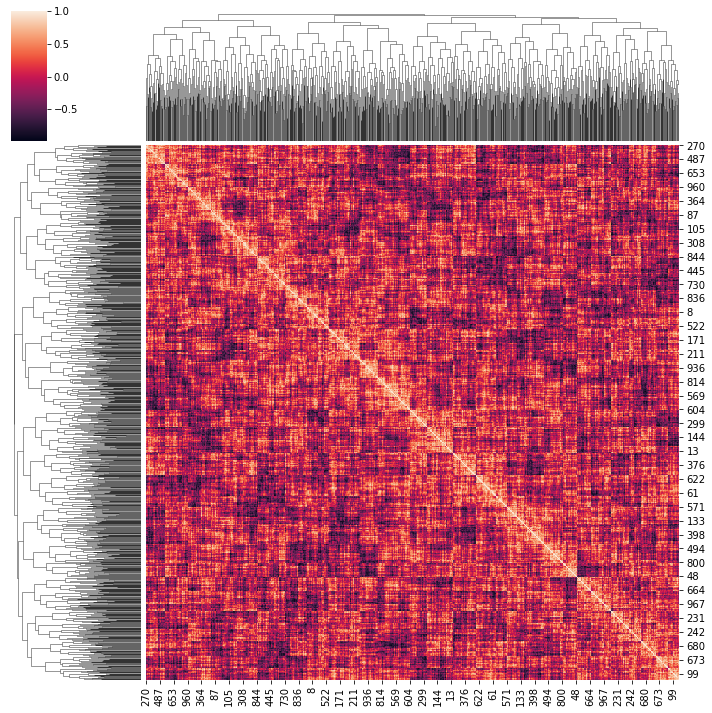

In [10]:
_ = sns.clustermap(cos_sim_addresses)